In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('./Materials/311_service_requests_complete.csv', encoding="ISO-8859-1")

print('Shape of data (rows, columns):', df.shape, '\n')
print('Column Names: ', df.columns) # flagged means whether or not the article is incomplete or inaccurate


df.head()

In [ ]:
# df = df.loc[df['Agency'].isin(['DSNY','DOHMH', 'DEP', 'DOB'])]

# define in which colums to look for missing values: we want the case to be closed
df = df.replace(np.nan, 0) 
df = df.loc[df['closed_date'] != 0]
df = df.loc[df['due_date'] != 0]
df = df.loc[df['resolution_date'] != 0]


df['created_date']= pd.to_datetime(df['created_date'])
df['closed_date']= pd.to_datetime(df['closed_date'])
df['due_date']= pd.to_datetime(df['due_date'])
df['resolution_date']= pd.to_datetime(df['resolution_date'])


# news_df = news_df.sort_index(ascending=True)
# news_df = news_df[['articleUrl', 'categories', 'flagged', 'source', 'sourceUrl', 'title', 'article', 
#              'num_words_not_in_dictionary', 'stopwords2words', 'readability_score', 'sentiment_polarity']]

df = df.reset_index(drop=True) 
df

In [ ]:
df["response_time"] = df["resolution_date"] - df["created_date"]
# remove response time under 30 minutes
# df = df.loc[df['Closed Date'] != 0]
df['response_time'] = df['response_time'].dt.total_seconds() / 86400
# df = df.loc[df['response_time'] > 30] # 

# df["scheduled_response_period"] = df["Due Date"] - df["Created Date"]
# df['scheduled_response_period'] = df['scheduled_response_period'].dt.total_seconds() / 60

df["response_lateness"] = df["due_date"] - df["resolution_date"]
df['response_lateness'] = df['response_lateness'].dt.total_seconds() / 86400

# df1 = df.loc[df['response_time'] == 'Standing Water']
# df1

# df1
df

In [ ]:
df0 = df.groupby("borough").mean()
df0 = df0.reset_index()
df0

In [ ]:
df1 = df0.drop(df0.index[5])
df1

In [2]:
df1 = pd.DataFrame(columns=["borough", "time", "type"], data=[["BRONX", 15.815731, 'Time'],
                                                             ["BRONX", -0.930169, 'Lateness'],
                                                             ["BROOKLYN", 19.900090	, 'Time'],
                                                             ["BROOKLYN", -20.996806, 'Lateness'],
                                                             ["MANHATTAN", 22.766938, 'Time'],
                                                             ["MANHATTAN", 4.679331, 'Lateness'],
                                                             ["QUEENS", 23.086355, 'Time'],
                                                             ["QUEENS", -52.411406, 'Lateness'],
                                                             ["STATEN ISLAND", 23.344368, 'Time'],
                                                             ["STATEN ISLAND", -41.310241, 'Lateness']])

In [ ]:
# response lateness
# std deviation
# set up seaborn for plot consistency
def sns_reset():
    sns.set(font_scale = 1.2)
#     sns.set_style('white')
#     sns.set_style('ticks')
    sns.despine()
    # sns.set_context('poster')
    
    # colors and axes
#     global color_set
#     color_set = 'Blues_r' # adjust this colorset
#     sns.set_palette('Blues_r')
    f, ax = plt.subplots()
    f.set_size_inches(7, 5)
    return f, ax

In [ ]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

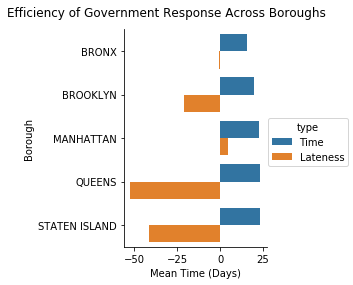

In [19]:






ax = sns.factorplot(x='time', y='borough', hue='type', data=df1, kind='bar')
ax.set(ylabel='Borough', xlabel='Mean Time (Days)', )
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Efficiency of Government Response Across Boroughs') # can also get the figure from plt.gcf(

fig.savefig('example.png')

In [ ]:
# plot airline graphs
sns.set()
f, ax = sns_reset()
f.set_size_inches(10, 6)

# set fonts
font = {'fontname':'Arial'}

sns.barplot(y = df1.borough, \
            x = df1.response_lateness, \
           palette = 'Blues_r')
plt.title('Efficiency of Government Response Across Boroughs (Response Lateness)', **font)
plt.xlabel('Mean Time (days)', **font)
plt.ylabel('Borough Name', **font)

plt.savefig('./visualizations/airline-flight-distribution.png', dpi = 600)
plt.show()






In [ ]:
sns.set()
f, ax = sns_reset()
f.set_size_inches(10, 6)

# set fonts
font = {'fontname':'Arial'}

sns.barplot(y = df1.borough, \
            x = df1.response_time, \
           palette = 'Blues_r')
plt.title('Efficiency of Government Response Across Boroughs (Response Time)', **font)
plt.xlabel('Mean Time (days)', **font)
plt.ylabel('Borough Name', **font)
plt.savefig('./visualizations/airline-flight-distribution1.png', dpi = 600)
plt.show()



# enviornmental data

In [ ]:
environment_df = pd.read_csv('Materials/environmental_radiation.csv')
environment_df.head()

In [ ]:
environment_df['sample_location'].unique()

In [ ]:
import shapefile as shp
import matplotlib.pyplot as plt

sf = shp.Reader("./geo_export_ed304d49-3aaf-4cbd-9c75-28380a34d7c6.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [ ]:
import copy
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

nyc_geo_df = pd.read_csv('./Materials/geographic.csv')
all_coordinates = nyc_geo_df.values.flatten('F')

all_coordinates = np.reshape(all_coordinates, (-1, 2))
    

def density_map(latitudes, longitudes, center, bins=1000, radius=0.1):  
    cmap = copy.copy(plt.cm.jet)
    cmap.set_bad((0,0,0))  # Fill background with black

    # Center the map around the provided center coordinates
    histogram_range = [
        [center[1] - radius, center[1] + radius],
        [center[0] - radius, center[0] + radius]
    ]
    
    fig = plt.figure(figsize=(5,5))
    plt.hist2d(longitudes, latitudes, bins=bins, norm=LogNorm(),
               cmap=cmap, range=histogram_range)

    # Remove all axes and annotations to keep the map clean and simple
    plt.grid('off')
    plt.axis('off')
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()
    

# Coordinates of Porto's city center
porto = [40.7128, -74.0060]
# Separate the latitude and longitude values from our list of coordinates
latitudes = all_coordinates[:,0]
print(latitudes)
longitudes = all_coordinates[:,1]
# Render the map
density_map(latitudes, longitudes, center=porto)



In [ ]:
heatmap of governmental delay